In [1]:
%load_ext autoreload
%autoreload 2
from IPython.display import display

In [2]:
import logging
logging.basicConfig(
    format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO, force=True
)

In [3]:
from flair.embeddings import WordEmbeddings, FlairEmbeddings, StackedEmbeddings

model_name = "flair_stacked"

stacked_embeddings = StackedEmbeddings([
                                        WordEmbeddings('glove'),
                                        FlairEmbeddings('news-forward'),
                                        FlairEmbeddings('news-backward'),
                                       ])

2023-08-16 18:51:57,425 - INFO - loading KeyedVectors object from /home/bardanik-rem/.flair/embeddings/glove.gensim
2023-08-16 18:51:58,057 - INFO - loading vectors from /home/bardanik-rem/.flair/embeddings/glove.gensim.vectors.npy with mmap=None
2023-08-16 18:51:58,092 - INFO - setting ignored attribute vectors_norm to None
2023-08-16 18:51:59,430 - INFO - KeyedVectors lifecycle event {'fname': '/home/bardanik-rem/.flair/embeddings/glove.gensim', 'datetime': '2023-08-16T18:51:59.430332', 'gensim': '4.3.1', 'python': '3.11.4 | packaged by conda-forge | (main, Jun 10 2023, 18:08:17) [GCC 12.2.0]', 'platform': 'Linux-6.1.0-10-amd64-x86_64-with-glibc2.36', 'event': 'loaded'}


In [4]:
import utils, evaluators
ev = evaluators.FlairEvaluator(stacked_embeddings, model_name)
ev.load_dataset("../datasets/dataset_1.json")

In [5]:
ev.reset_evaluator()
evaluation = ev.evaluate()

'OOV:'

,Case ID,Keyword,Word,Classification,Similarity,Lost,OOV


'Lost:'

,Case ID,Keyword,Word,Classification,Similarity,Lost,OOV
1477,4,when,"(now, 0)",1,NaN,True,False
1478,4,when,"(now, 1)",1,NaN,True,False


'Statistics:'

,Threshold,Precision,Recall,F1 Score,Accuracy,AUC-PR
Methods,,,,,,
flair_stacked-cos,0.469301,0.597561,0.576471,0.586826,0.955398,0.542731


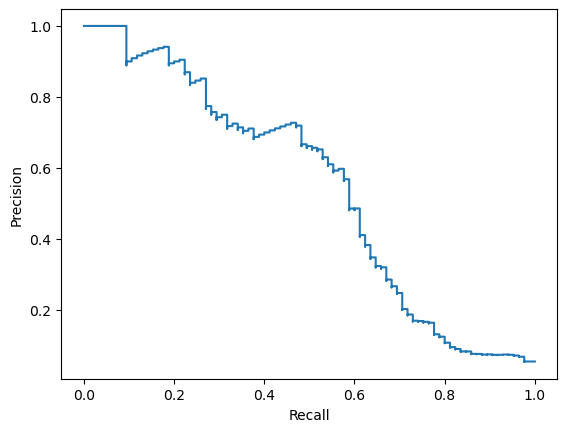

In [6]:
st = utils.Statistics(ev)

display("OOV:")
display(st.get_oov())

display("Lost:")
display(st.get_lost())

stats = st.calculate_statistics()
display("Statistics:")
display(stats)

st.display_PRC()

,Threshold,Precision,Recall,F1 Score,Accuracy,AUC-PR
Methods,,,,,,
flair_stacked-cos,0.469301,0.597561,0.576471,0.586826,0.955398,0.542731
flair_stacked-dot,26.648151,0.571429,0.564706,0.568047,0.952812,0.522223
flair_stacked-euc,4.474280,0.560000,0.329412,0.414815,0.948933,0.404382


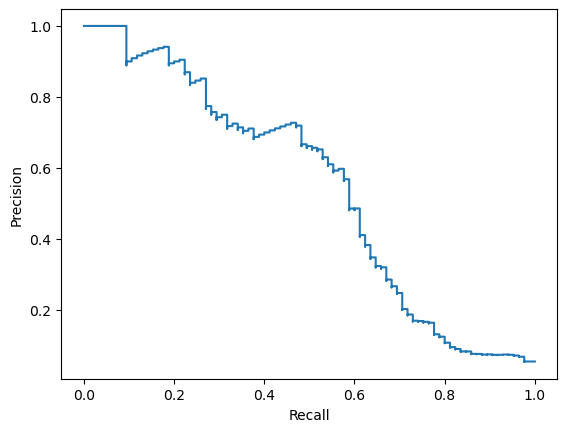

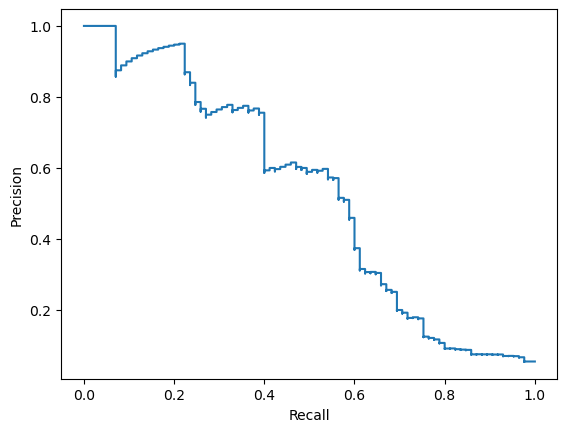

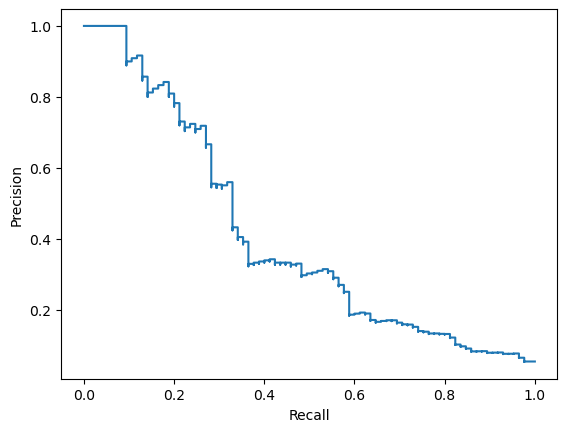

In [7]:
import pandas as pd
methods = [member for member in utils.SimilarityFunction]

results = pd.DataFrame()

for method in methods:
    ev.similarity_method = method
    ev.reset_evaluator()
    data = ev.evaluate()
    st = utils.Statistics(ev)
    stats = st.calculate_statistics()
    st.display_PRC()
    results = pd.concat([results, stats])

display(results)